Dana Rodriguez Sandi 20190910 

Alessandra Rossell 20140656 (Python)

Reporte 10- Control de Lectura 

En este articulo titulado ¿Quién se vuelve inventor en Estados Unidos? La importancia de la exposición a la innovación”, los autores se plantean la posibilidad de que existen factores exógenos que influyen en la innovación que no son únicamente “habilidades naturales" como en otros estudios. Partiendo de este este enfoque surgen preguntas de investigación con respecto si los factores como clase social, raza o género determinantes para ser un inventor. Otra pregunta que se desprenden es si es probable que las infancias que se trasladan a áreas de alta innovación se vuelvan mejores inventores. Se sugiere en el artículo como hipótesis que la exposición de los niños y las niñas a figuras de inventores es un factor clave para el desarrollo de estos como inventores. 


La fortaleza de este articulo  en cuanto al tema es  que mediante un algoritmo se realizan comparaciones de como convertirse en inventores. Posteriormente, estos resultados se comparan para ver la brecha es explicada por estas características. , y se logra realizar  un análisis sobre qué tan alejada esta la  invención del entorno de los niños seleccionados. . Con estos datos y con una regresión sobre efectos fijos sobre el vecindario es posible llegar a la hipótesis. Por otro lado, se encuentran debilidades , se pudo haber incluido en el estudio variables de innovación que no sean solo patentes para elegir a los sujetos,  ya que no toda innovación termina en patentes.



El articulo contribuye al tema porque proporciona evidencia en el tema y sirve para determinar cómo  encontrar la mayor parte de los posibles futuros inventores en áreas de ciencia y tecnología, en base a características de la condiciones en las que crecieron los sujetos de la muestra.  . Estos resultados presentan otro enfoque, la exposición a la innovación durante la infancia, como un factor determinante crítico. Por consiguiente, se dice que las políticas que aumentan la exposición de los niños a esta  tienen la capacidad de aumentar en gran medida la innovación y a su vez el crecimiento económico.


Los próximos pasos posibles  en esta investigación podrían estar encocados a una comparación con el caso latinoamericano, tomando en cuenta las diferentes condiciones socioeconómicas de la población . Para esto sería necesario tomar en cuenta artículos como “Innovación en América Latina” de la Revista Latinoamericana de Administración  https://www.redalyc.org/pdf/716/71629937002.pdf, que nos brinda una mirada sobre el estado de la innovación en áreas de ciencia y tecnología en diferentes países de latinoamerica y el caribe. Por otro lado, esto se puede profundizar con la publicación de las Naciones Unidas y la Sociedad Americana de Economía https://repositorio.cepal.org/bitstream/handle/11362/44711/1/RVI127_en.pdf. En esta se evalúa la eficacia de las economías latinas en crear un ambiente propicio para la innovación.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, warnings
import statsmodels.formula.api as smf

In [60]:
from causalgraphicalmodels import CausalGraphicalModel
from cProfile import label
%matplotlib inline

<h1> Regresión Discontinua <h1>

* **Explique de manera muy breve y resumida en qué consiste una regresión discontinua.**

Se entiende por regresion discontinua al diseño causal experimental que permite ayudar a la realizacion de inferencias causalesa falta de la aleatorización. Asimismo, este tipo de regresion permite comparar el resultado  por encima y pord ebajo del umbral. Esto permite determinar el efcto del tratamieto en el umbral. Finalmente, de tener el tratamiento salta de 0 a 1 en el umbral, por lo cual seria un diseño RD nitido.

* **Detalle un ejemplo en la vida real en donde podría emplear una regresión discontinua.**

Un ejemplo es el evaluar el efecto que tiene  la calidad de una universidad sobre el desempeño de los estudiantes en el mercado laboral, ya que no seria admisible hacer una comparacion entre las personas que tuvieron una educacion universitaria y las que no.


En ese sentido, un marco no experimental nos permitiria saber cual es el fecto causal en el que influye como es la variacion en el desempeño de estudiantes con previo aprendizaje con los que no.

* **Explique el diseño Sharp Desing y comente un ejemplo en la vida real en donde podría aplicarlo (sea lo más detallado posible).**

Este tipo de diseño se utiliza en casos donde se señala el tratamiento cuando se da un punto de corte discreto en donde los elegibles deciden el tratamiento.

<h1> Aplicaciones <h1>

* **Siguiendo todo el apartado Simulated Data, trabaje con la siguiente ecuación, según sea su caso, y replique los resultados correspondientes, incluidos los gráficos respectivos.**

#################################**EJEMPLO1**################################333333

In [67]:

#implemntaciond e la base de datos para el grafico de la regresion

base = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
##valores menores a 0, la variable "base.x" tomara "0"
base.loc[base.x<0, 'x'] = 0
base = base[base.x<100]
base['D'] = 0

##valores mayores  a 50, la variable "base.D" tomara "1"
base.loc[base.x>50, 'D'] = 1

##ecuacion de la regreseion 
base['y'] = 15 + 22*base.D + 2.5 * base.x + np.random.normal(0, 20, dat.shape[0])

##casos

base0 = base[base.D == 0]

base1 = base[base.D == 1]

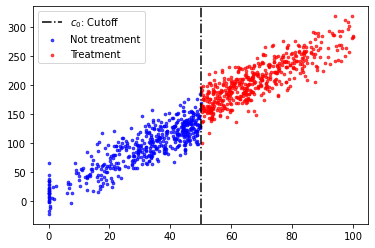

In [68]:
##GRAFICA DE VALORES SEGUN LAS ECUACIONES Y PREDICCIONES

treat_c = "red" 
n_treat = "blue" 

plt.scatter("x", "y", data = base0, color = n_treat, alpha= .7, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = base1, color = treat_c, alpha= .7, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")
plt.legend();

In [69]:
def y_hat_lin(datos, x = "x", y = "y"):
    yhat= smf.ols(f"{y} ~ {x}", data = datos).fit().predict()
    datos["yhat"]=yhat
    datos.sort_values('yhat', inplace = True)
    return datos

datos0 = y_hat_lin(base0)
datos1 = y_hat_lin(base1)
    

C:\Users\catono\AppData\Local\Temp/ipykernel_23512/4130397226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["yhat"]=yhat
C:\Users\catono\Documents\anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


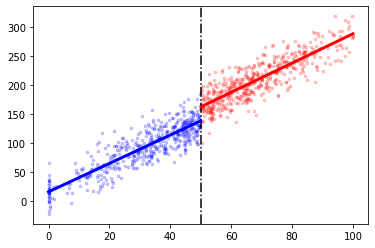

In [70]:
#PREDEICION DE LA TENDENCIA LINEA Y VARIACION PARA EL EFFECTO

plt.scatter("x", "y", data = base0, color = n_treat, alpha= .2, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = base1, color = treat_c, alpha= .2, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = datos0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = datos1, color = treat_c, lw = 3);

In [71]:
#EFFECTO
variacion = min(datos1.yhat) - max(datos0.yhat)
variacion = round(eff,  2)
print("Effect:", f"{variacion}")

Effect: 21.2


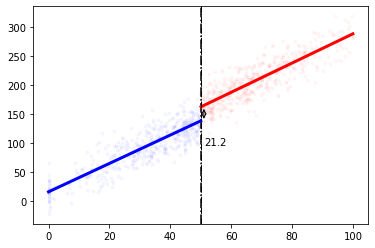

In [72]:
plt.scatter("x", "y", data = base0, color = n_treat, alpha= .03, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = base1, color = treat_c, alpha= .03, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = datos0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = datos1, color = treat_c, lw = 3)
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff", lw = 1)
plt.annotate(f"{variacion}", xy = (51, eff + 76))
plt.annotate("", xy = (51, max(datos0.yhat)), xytext = (51, min(datos1.yhat)), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"));

###############################**EJEMPLO2**########################################333

In [50]:
#implemntaciond e la base de datos para el grafico de la regresion
base2 = pd.DataFrame({'x': np.random.normal(50, 25, 1000)})
##valores menores a 0, la variable "base.x" tomara "0"
base2.loc[base2.x<0, 'x'] = 0
base2 = base2[base2.x<100]
base2['D'] = 0
##valores mayores  a 50, la variable "base.D" tomara "1"
base2.loc[base2.x>50, 'D'] = 1

##ecuacion de la regreseion 
base2['y'] = 12 + 60*base2.D + 1.3 * base2.x + np.random.normal(0, 20, base2.shape[0])

##casos

base2_0 = base2[base2.D == 0]

base2_1 = base2[base2.D == 1]

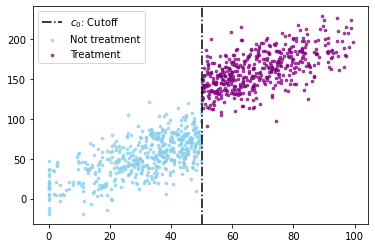

In [51]:
##GRAFICA DE VALORES SEGUN LAS ECUACIONES Y PREDICCIONES
treat_c = "purple" 
n_treat = "skyblue" 

plt.scatter("x", "y", data = base2_0, color = n_treat, alpha= .7, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = base2_1, color = treat_c, alpha= .7, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")
plt.legend();

In [52]:
def y_hat_lin(datos2, x = "x", y = "y"):
    yhat = smf.ols(f"{y} ~ {x}", data = datos2).fit().predict()
    datos2["yhat"] = yhat
    datos2.sort_values('yhat', inplace = True)
    return datos2

model2_y0 = y_hat_lin(base2_0)
model2_y1 = y_hat_lin(base2_1)

C:\Users\catono\AppData\Local\Temp/ipykernel_23512/2582456778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos2["yhat"] = yhat
C:\Users\catono\Documents\anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


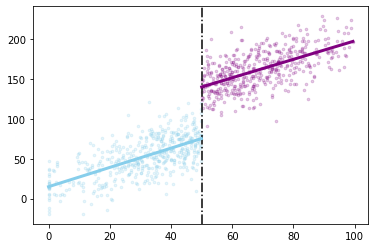

In [53]:
#PREDEICION DE LA TENDENCIA LINEA Y VARIACION PARA EL EFFECTO
plt.scatter("x", "y", data = base2_0, color = n_treat, alpha= .2, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = base2_1, color = treat_c, alpha= .2, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = model2_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = model2_y1, color = treat_c, lw = 3);

In [57]:
##EFFECTO
variacion2 = min(model2_y1.yhat) - max(model2_y0.yhat)
variacion2 = round(variacion2,  2)
print("Effect:", f"{variacion2}")

Effect: 64.73


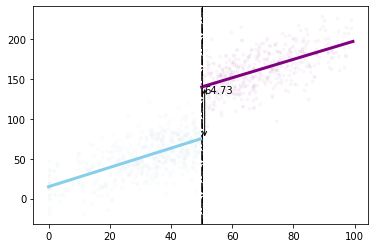

In [59]:
plt.scatter("x", "y", data = base2_0, color = n_treat, alpha= .03, s = 7, label = "Not treatment")
plt.scatter("x", "y", data = base2_1, color = treat_c, alpha= .03, s = 7, label = "Treatment")
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff")

plt.plot("x", "yhat", data = model2_y0, color = n_treat, lw = 3)
plt.plot("x", "yhat", data = model2_y1, color = treat_c, lw = 3)
plt.axvline(50, color = "black", linestyle = "-.", label = r"$c_0$: Cutoff", lw = 1)
plt.annotate(f"{variacion2}", xy = (51, eff2 + 76))
plt.annotate("", xy = (51, max(model2_y0.yhat)), xytext = (51, min(model2_y1.yhat)), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"));